In [93]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from helpers.collection_of_experiments import CollectionOfExperiments
from helpers.computational_tools import remesh
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read all experiments in the folder. Concatenete collections with "+" operator, which concatenate dictionary of experiments.

In [94]:
%%time
ds = CollectionOfExperiments.init_folder('example_experiments/reference_simulations') + \
     CollectionOfExperiments.init_folder('example_experiments/R4_parameterized')

CPU times: user 350 µs, sys: 104 µs, total: 454 µs
Wall time: 289 µs


In [95]:
exps = ds.exps
print(exps)

['R4', 'R8', 'R4_bad_model', 'R4_good_model']


# Basic snapshots plotting

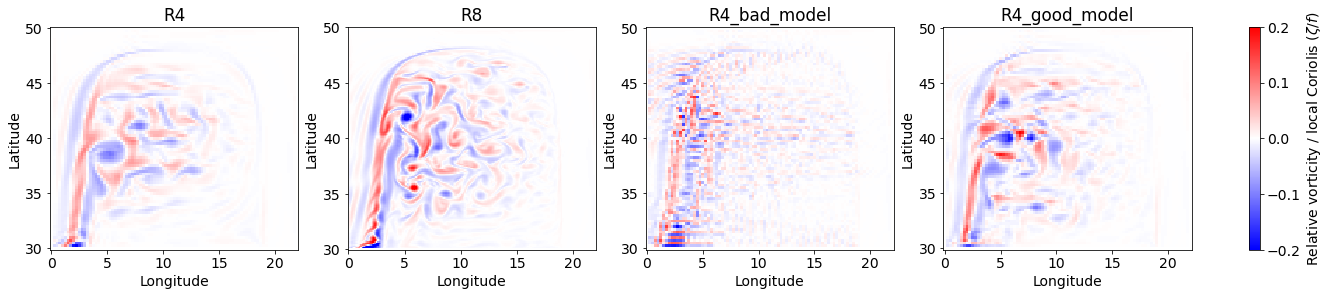

In [96]:
fig, ax = ds.get_axes(nfig=4,ncol=4)
ds.plot_RV(exps,ax=ax);

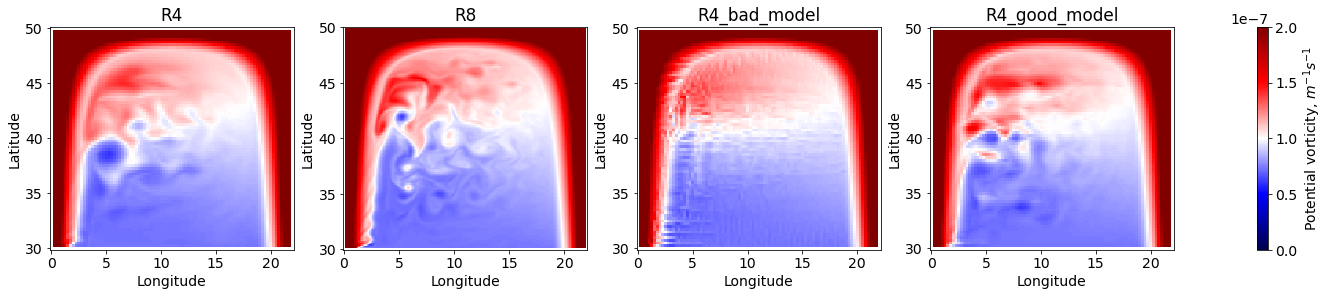

In [97]:
fig, ax = ds.get_axes(nfig=4,ncol=4)
ds.plot_PV(exps,ax=ax);

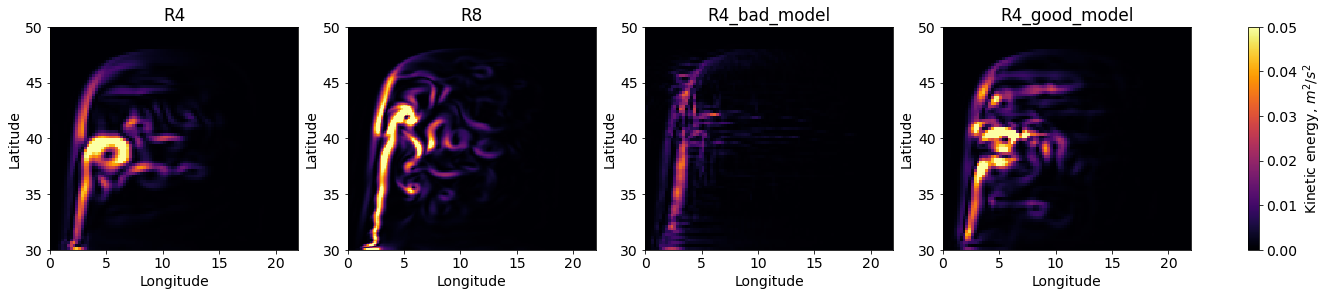

In [98]:
fig, ax = ds.get_axes(nfig=4,ncol=4)
ds.plot_KE(exps,ax=ax);

# Building of movies

In [99]:
%%time
animate_function = ds.animate(ds.plot_PV, nfig=4, ncol=4, videoname='PV.mp4')
animate_function(exps);

CPU times: user 23.6 s, sys: 308 ms, total: 23.9 s
Wall time: 24.3 s


'PV.mp4'

In [100]:
%%time
animate_function = ds.animate(ds.plot_KE, nfig=4, ncol=4, videoname='KE.mp4')
animate_function(exps);

CPU times: user 30.3 s, sys: 609 ms, total: 30.9 s
Wall time: 29.1 s


'KE.mp4'

# Build custom figure layout with "get_axes"

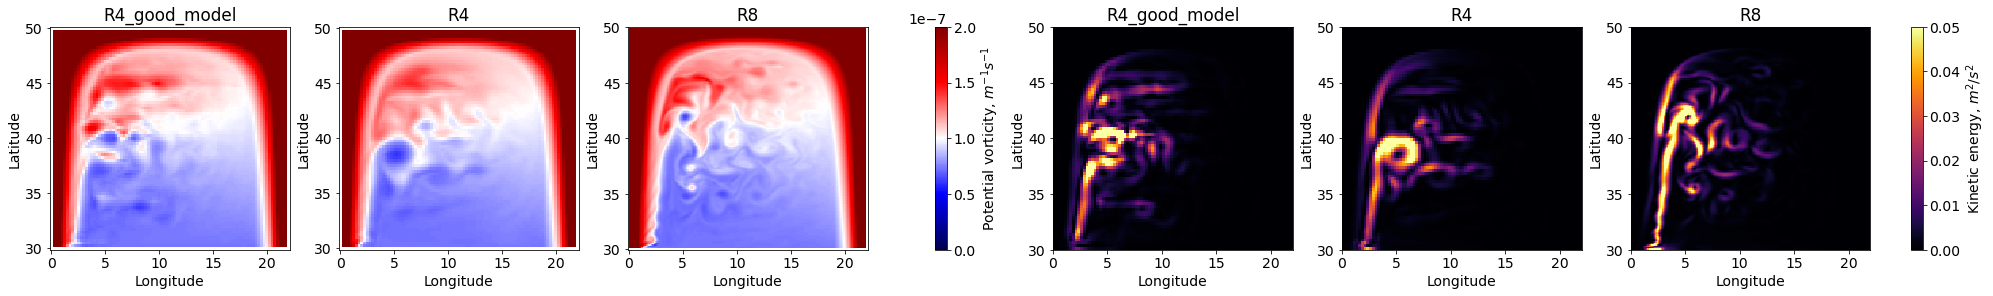

In [101]:
fig, ax = ds.get_axes(nfig=6, ncol=6)
ds.plot_PV(['R4_good_model', 'R4', 'R8'], ax=ax[:3]);
ds.plot_KE(['R4_good_model', 'R4', 'R8'], ax=ax[3:]);

# Remesh of xarray

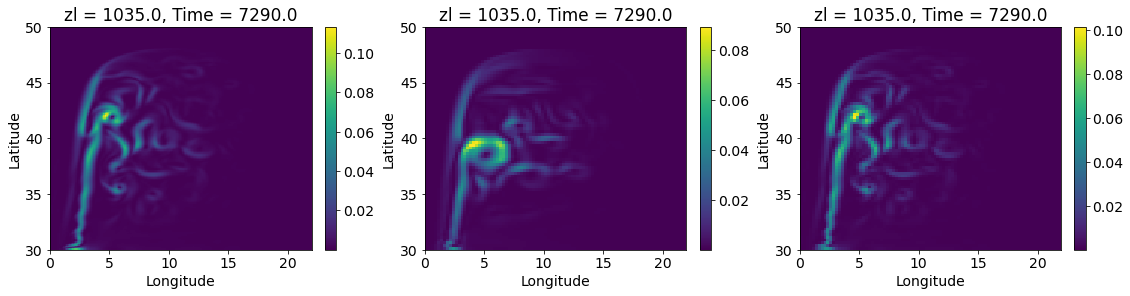

In [102]:
input = ds['R8'].KE.isel(zl=0, Time=-1)
target = ds['R4'].KE.isel(zl=0, Time=-1)
result = remesh(input, target);

fig, ax = ds.get_axes(nfig=3,ncol=3, ratio=1.3)
input.plot(ax=ax[0])
target.plot(ax=ax[1])
result.plot(ax=ax[2])

# Remesh of Experiment instance

In [103]:
ds.remesh('R8', 'R4')

Experiment R8 coarsegrained to R4 is created. Its identificator=R8_R4


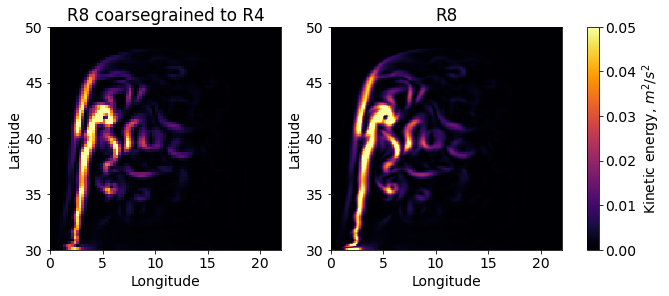

In [104]:
ds.plot_KE(['R8_R4', 'R8'])

# Statistical tools. Spectral analysis

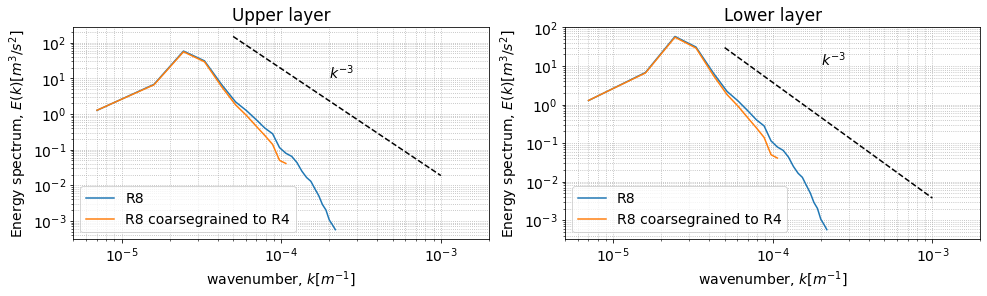

In [105]:
fig, ax = ds.get_axes(nfig=2,ncol=2,ratio=1.7)
ds.plot_KE_spectrum(['R8', 'R8_R4'],ax=ax);

# Concatenation tools

In [106]:
dds = xr.concat([ds['R8_R4'].KE, ds['R4_bad_model'].KE, ds['R4_good_model'].KE], 
                dim='EXP')
dds.__setitem__('EXP', ['R8_R4', 'R4_bad_model', 'R4_good_model'])

In [107]:
error = dds - dds.sel(EXP='R8_R4')
mean_error = np.abs(error.isel(Time=slice(100,243)).mean(dim='Time'))
mean_error

<xarray.DataArray (EXP: 3, zl: 2, yh: 80, xh: 88)>
dask.array<absolute, shape=(3, 2, 80, 88), dtype=float32, chunksize=(1, 2, 80, 88), chunktype=numpy.ndarray>
Coordinates:
  * zl       (zl) float64 1.035e+03 1.036e+03
  * yh       (yh) float64 30.12 30.38 30.62 30.88 ... 49.12 49.38 49.62 49.88
  * xh       (xh) float64 0.125 0.375 0.625 0.875 ... 21.12 21.38 21.62 21.88
  * EXP      (EXP) <U13 'R8_R4' 'R4_bad_model' 'R4_good_model'

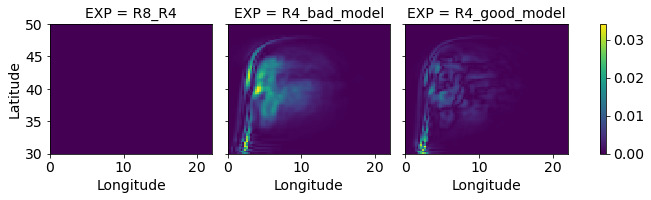

In [108]:
mean_error.isel(zl=0).plot(col='EXP')